In [4]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
df = pd.read_excel("Dataset 5944.xlsx")

# Ensures type numeric to prevent issues during statistical analysis
groupNo = pd.to_numeric(df.iloc[2:26, 1])
weightGain = pd.to_numeric(df.iloc[2:26, 2])

# Define group names and number of unique groups
groupNames = ['Standard Diet', 'Junk Food', 'Reduced Diet']
uniqueGroups = np.unique(groupNo)

# Groups weights for analysis
groupedWeights = [weightGain[groupNo == i] for i in uniqueGroups]

**Data Visualisation (15 Marks)**

C:\Users\Jake\AppData\Local\Temp\ipykernel_38024\3999577863.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groupedWeights, labels=groupNames, patch_artist=True, boxprops=dict(facecolor="lightgreen", color="black"), medianprops=dict(color="red"))


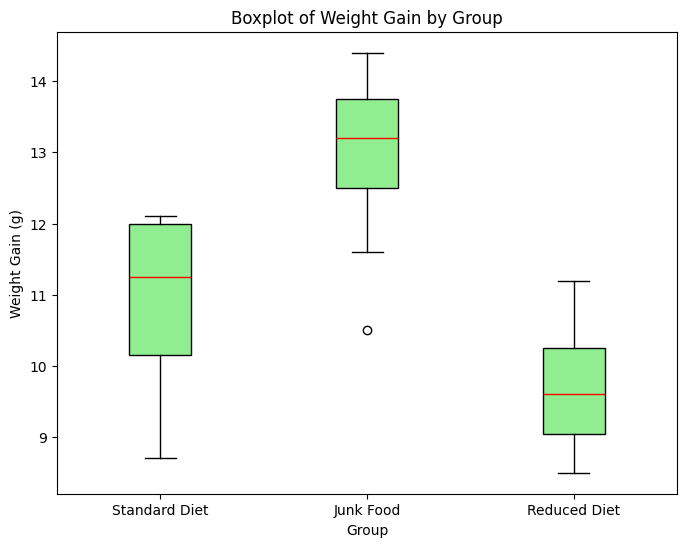

In [5]:
# Boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(groupedWeights, labels=groupNames, patch_artist=True, boxprops=dict(facecolor="lightgreen", color="black"), medianprops=dict(color="red"))
plt.title("Boxplot of Weight Gain by Group")
plt.xlabel("Group")
plt.ylabel("Weight Gain (g)")
plt.show()

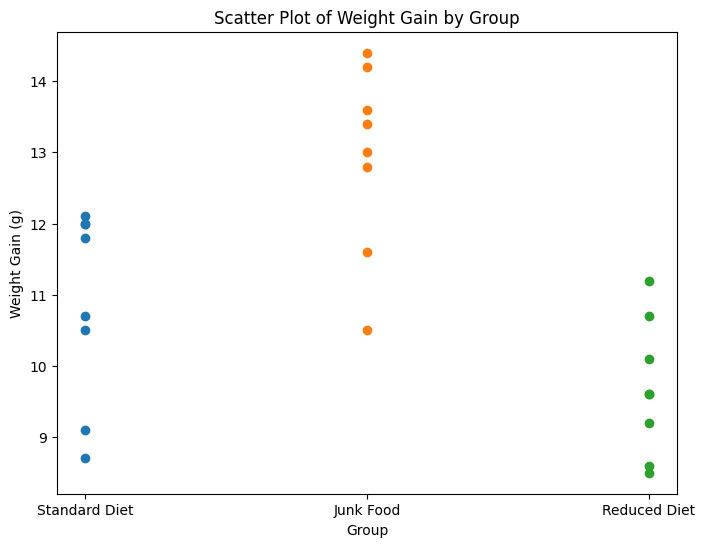

In [6]:
# Scatter Plot
plt.figure(figsize=(8, 6))
for i in uniqueGroups:
    plt.scatter([i] * len(weightGain[groupNo == i]), weightGain[groupNo == i])
plt.title("Scatter Plot of Weight Gain by Group")
plt.xlabel("Group")
plt.ylabel("Weight Gain (g)")
plt.xticks(ticks=np.arange(1, len(groupNames) + 1), labels=groupNames) # same with this one
plt.show()

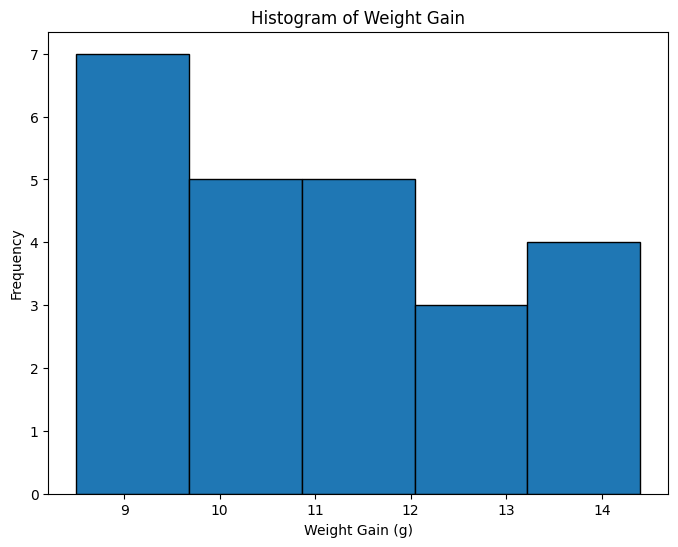

In [7]:
# Histogram
plt.figure(figsize=(8, 6))
plt.hist(weightGain, bins=5, edgecolor='black')
plt.title("Histogram of Weight Gain")
plt.xlabel("Weight Gain (g)")
plt.ylabel("Frequency")
plt.show()

The data shows the weight gain of three different diets: standard, junk food and reduced. These three diets can be visually compared and to do so I have chosen to use a boxplot, scatter plot and a histogram.

Boxplots are useful to understand the distribution of weight gains within the different groups as it displays central tendency, variability and outliers. This allows us to get an understanding of skew of the data and to identify extreme values. We can see that the standard diet shows strong negative skew, the junk food diet appears symmetrical and the reduced diet shows some positive skew. The junk food diet does however show one significant outlier at aronud 10.5g weight gain.

A scatter plot was selected to show and evaluate individual points in the dataset allowing us to make more granular observations about the data within each group. We can see that the junk food diet has the highest variability, the standard diet shows a moderate variability and the reduced diet shows the least. Importantly we can see that there is not a lot of overlap between the junk food diet and either of the others which highlights the need for further statistical testing.

Finally a histogram was chosen to understand the overall trends in the data across all three groups. We can see that the data is not evenly distributed and that most of the values are concentrated around the lower range indicating a negative skew to the dataset. Due to the histograms asymmetry further testing will be needed to identify the normality of the data and therefore the type of inferential statistical testing that can be implemented.

**Statistical Summary (20 Marks)**

In [8]:
# Descriptive Statistics
descStats = []
for i in uniqueGroups:
    groupWeights = weightGain[groupNo == i]
    mean = np.mean(groupWeights)
    median = np.median(groupWeights)
    std_dev = np.std(groupWeights, ddof=1)  # ddof, degrees of freedom needs to be set to 1 for sample standard deviation
    sem = stats.sem(groupWeights)
    descStats.append((groupNames[i-1], mean, median, std_dev, sem))

# Compiles the descriptive statistics into a dataframe for nicer presentation
desc_df = pd.DataFrame(descStats, columns=['Group', 'Mean', 'Median', 'Std Dev', 'SEM'])
print(desc_df)

           Group     Mean  Median   Std Dev       SEM
0  Standard Diet  10.8625   11.25  1.359556  0.480676
1      Junk Food  12.9375   13.20  1.316855  0.465579
2   Reduced Diet   9.6875    9.60  0.950845  0.336175


In [9]:
# Inferential Statistics
alpha = 0.05

# Shapiro-Wilk Test for Normality
for i in uniqueGroups:
    stat, p_value = stats.shapiro(groupedWeights[i-1])
    if p_value >= alpha:
        print(f"Shapiro-Wilk Test for Group {i}: p-value = {p_value: .5f}, Group is normal.")
    else:
        print(f"Shapiro-Wilk Test for Group {i}: p-value = {p_value: .5f}, Group is not normal.")

# ANOVA can be performed due to normality of data
anovaResult = stats.f_oneway(*groupedWeights)
print("ANOVA result:", anovaResult)
if anovaResult.pvalue < alpha:
    print(f"ANOVA P-Value:{anovaResult.pvalue: .5f} is less than Alpha: {alpha} so shows a statistical significant difference in mean weight gain between groups")
else:
    print(f"ANOVA P-Value:{anovaResult.pvalue: .5f} is greater than Alpha: {alpha} so does not show a statistical significant difference in mean weight gain between groups")

# Bonferroni correction to control for Type I Error
bonferroniAlpha = alpha/len(uniqueGroups)
print("Bonferroni-corrected alpha:", bonferroniAlpha)

# Post-hoc Test
for i in range(len(uniqueGroups)):
    for j in range(i + 1, len(uniqueGroups)):
        groupA = weightGain[groupNo == uniqueGroups[i]]
        groupB = weightGain[groupNo == uniqueGroups[j]]
        t_stat, p_val = stats.ttest_ind(groupA, groupB)
        if p_val < bonferroniAlpha:
            print(f"{groupNames[i]} vs {groupNames[j]} p = {p_val: .5f} (Significant)")
        else:
            print(f"{groupNames[i]} vs {groupNames[j]} p = {p_val: .5f} (Not Significant)")

Shapiro-Wilk Test for Group 1: p-value =  0.07766, Group is normal.
Shapiro-Wilk Test for Group 2: p-value =  0.44343, Group is normal.
Shapiro-Wilk Test for Group 3: p-value =  0.73852, Group is normal.
ANOVA result: F_onewayResult(statistic=np.float64(14.486447761194034), pvalue=np.float64(0.00011132435759914625))
ANOVA P-Value: 0.00011 is less than Alpha: 0.05 so shows a statistical significant difference in mean weight gain between groups
Bonferroni-corrected alpha: 0.016666666666666666
Standard Diet vs Junk Food p =  0.00782 (Significant)
Standard Diet vs Reduced Diet p =  0.06491 (Not Significant)
Junk Food vs Reduced Diet p =  0.00006 (Significant)


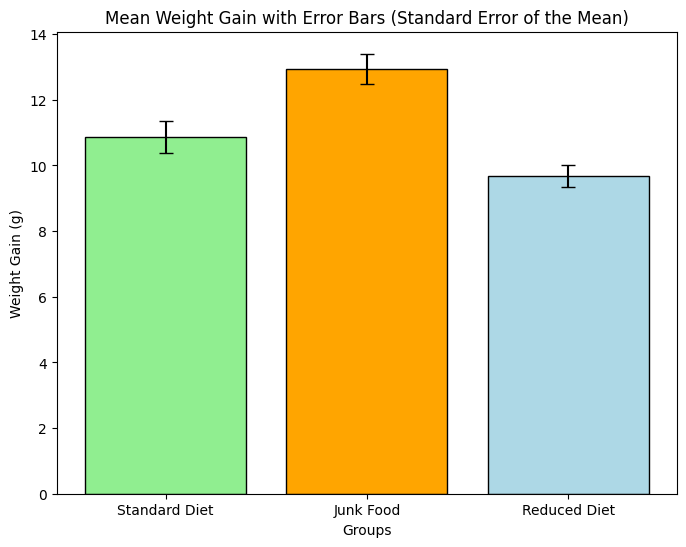

In [10]:
# Bar Plot with Error Bars (Standard Error of the Mean) 
plt.figure(figsize=(8, 6))
plt.bar(groupNames, desc_df['Mean'], yerr=desc_df['SEM'], capsize=5, color=['lightgreen', 'orange', 'lightblue'], edgecolor='black')
plt.title("Mean Weight Gain with Error Bars (Standard Error of the Mean)")
plt.ylabel("Weight Gain (g)")
plt.xlabel("Groups")
plt.show()

For the descriptive statistics means, medians, standard deviations, and standard errors were all taken and compliled into a dataframe to allow for direct comparison. While the histogram appears to show that the data is skewed, performing a Shapiro-Wilk test shows that all three groups are considered to be normal and therefore the mean is preferred over the median. Following from this the standard error of the mean was chosen as we are comparing the means across multiple groups.  

Similarly due to the normality of the data and as we are comparing three independent groups we can use a one-way ANOVA which revealed significant differences in weight gain between the groups (p < 0.05). 

To identify specific group differences we must perform a post-hoc test. Pairwise t-tests with a Bonferroni correction were chosen to compare individual group differences while controlling the type I error. The results showed significant differences between Junk Food and both Standard Diet and Reduced Diet groups (p < Bonferroni-corrected α), while the comparison between the Standard and Reduced Diet groups were not significant.

This data is represented in a bar chart with error bars as it allows us to easily visually compare the central tendency across groups, the standard error error bars display how much the sample mean may differ from the true population mean and therefore allows us to asses the reliability of our sample means. Finally the position of the error bars can be used to visually distinguish statistical significance, if it appears there is an overlap between the error bars we can deduce that the difference between groups is not statistically significant, whereas if there is no overlap we can deduce that there is enough difference to be considered statistically significant. Therefore we can visually confirm that there is no statistically significant difference between the standard and reduced diets but that there is statistically significant differences between junk food and both standard and reduced diets.

**Discussion of Results (15 Marks)**

This study aimed to find which of three different diets — Standard, Junk food, and Reduced — causes the most weight change in deer mice. The descriptive statistics showed differences in weight gain across the groups. Junk food showed the largest mean weight gain, followed by the standard diet and finally the reduced diet. The standard diet showed the most variability, followed by junk food and then reduced diet. The data was confirmed as normal using a Shapiro-Wilk test allowing the use of an ANOVA, which confirmed significant differences between the groups. Post-hoc tests with a Bonferroni corrections showed statistically significant differences between junk food and both other diets, while there was no significant difference identified between the Standard and Reduced diet groups. The results of these statistical analyses imply that the Junk food diet causes the most weight change, however there is no implied significant difference in weight gain from a reduced deer mice diet compared to a standard diet.

Several issues must be acknowledged within the study. Firstly, sample size; using a small sample size reduces statistical power, therefore increasing the chance of failing to detect real effects/relationships (Type II Error). We must also be aware of how samples were selected to ensure it accurately represents the wider population. Following from this, it is not mentioned if other factors were considered or controlled for, such as baseline weight, physical activity, or metabolic rates, which could all have influenced the results and introduced bias. Another consideration is the duration of the study to account for long-term effects of the different diets.

To address the above limitations, the following improvements can be made:
- Conducting a power analysis to determine an appropriate sample size. This would ensure the study has sufficient power to detect meaningful differences.
- Using random assignment or baseline measurements to help control for variables such as physical activity and metabolism, reducing bias.
- Performing the study over a longer time to provide a more comprehensive understanding of the effects of the diets.
- The use of techniques such as ANCOVA to control for baseline differences or using stricter significance thresholds could enhance the accuracy of the results.

The redesigned study would employ randomised sampling to minimise bias. As before our independent variable is the type of diet, while our dependent variable is the weight gain, however age and baseline weight would be added as control variables. Significance level would remain at 0.05 however our sample size would be defined such that the power of our study would be 80%. Using a sample size calculator gives a required sample size per group of 30-35, to ensure robustness we will take 35 participants per group for an overall sample size of 105. The study will be conducted over a period of 12 weeks to allow us to better understand the long-term effects of the diets. With these changes I believe the study would be greatly improved.